<a href="https://colab.research.google.com/github/yuvalBerghaus/computer_vision/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

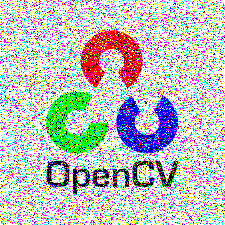

-1

In [22]:
import cv2
import numpy as np
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
# Load the image
img = cv2.imread("opencv_logo.png")

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
cv2_imshow(noise_img)
cv2.waitKey(0)

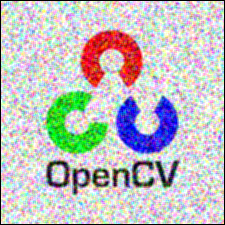

In [16]:
# Obtain the shape of the image
m, n, channels = noise_img.shape

# Develop a (3, 3) filtering mask
mask = np.ones([3, 3], dtype=int)
mask = mask / 9

# Convolve the 3x3 mask over the image
img_new = np.zeros([m, n, channels], dtype=np.uint8)

for i in range(1, m - 1):
    for j in range(1, n - 1):
        for c in range(channels):
            temp = (
                noise_img[i - 1, j - 1, c] * mask[0, 0]
                + noise_img[i - 1, j, c] * mask[0, 1]
                + noise_img[i - 1, j + 1, c] * mask[0, 2]
                + noise_img[i, j - 1, c] * mask[1, 0]
                + noise_img[i, j, c] * mask[1, 1]
                + noise_img[i, j + 1, c] * mask[1, 2]
                + noise_img[i + 1, j - 1, c] * mask[2, 0]
                + noise_img[i + 1, j, c] * mask[2, 1]
                + noise_img[i + 1, j + 1, c] * mask[2, 2]
            )
            img_new[i, j, c] = np.mean(temp)

# Save the blurred image
cv2.imwrite('blurred.tif', img_new)

# Display the blurred image
cv2_imshow(img_new)


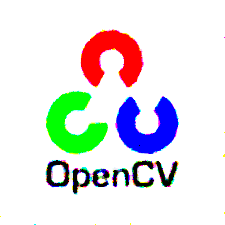

In [25]:
copy2 = cv2.medianBlur(noise_img, 5)
cv2_imshow(copy2)


Blurring filter



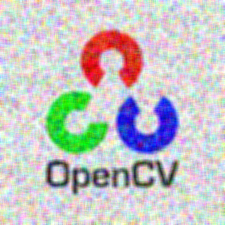

In [29]:
copy1 = cv2.blur(noise_img, (5, 5))
print("\nBlurring filter\n")
cv2_imshow(copy1)



After:



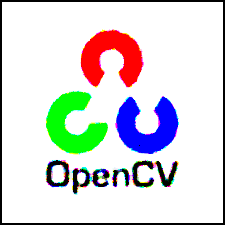

True

In [41]:
# Obtain the number of rows, columns, and channels of the image
m, n, channels = noise_img.shape

# Define the mask size
mask_size = (5, 5)

# Traverse the image and develop a filtering mask
img_new1 = np.zeros([m, n, channels], dtype=np.uint8)

for i in range(mask_size[0]//2, m - mask_size[0]//2):
    for j in range(mask_size[1]//2, n - mask_size[1]//2):
        temp = []

        for x in range(mask_size[0]):
            for y in range(mask_size[1]):
                temp.append(noise_img[i+x-mask_size[0]//2, j+y-mask_size[1]//2])

        temp = np.median(temp, axis=0)
        for c in range(channels):
            img_new1[i, j, c] = temp[c]

img_new1 = img_new1.astype(np.uint8)
print("\nAfter:\n")
cv2_imshow(img_new1)
cv2.imwrite('new_filtered.png', img_new1)
